## Import required modules

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

import riskfolio as pf
import riskfolio.PlotFunctions as plf

warnings.filterwarnings("ignore")

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

import math
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pyfolio as pyf

# 1) Get Nifty Constituent data


Pandas read_csv can also read csv from URLs
- read nifty 50 data from https://en.wikipedia.org/wiki/NIFTY_50

In [2]:
nifty_constituents = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[1]
nifty_constituents.head()

,Company Name,Symbol,Sector
0,Adani Ports,ADANIPORTS,Infrastructure
1,Asian Paints,ASIANPAINT,Consumer Goods
2,Axis Bank,AXISBANK,Banking
3,Bajaj Auto,BAJAJ-AUTO,Automobile
4,Bajaj Finance,BAJFINANCE,Financial Services


# 2) Get price data of the stocks

- Add ".NS" to symbol 
- Use start = '2019-01-01' end = '2022-1-30' and download ohlc data from yfinance
- Use Only "Adj Close"

In [3]:
nifty_constituents['Symbol'] = nifty_constituents['Symbol'] + ".NS"
nifty_constituents.head()

,Company Name,Symbol,Sector
0,Adani Ports,ADANIPORTS.NS,Infrastructure
1,Asian Paints,ASIANPAINT.NS,Consumer Goods
2,Axis Bank,AXISBANK.NS,Banking
3,Bajaj Auto,BAJAJ-AUTO.NS,Automobile
4,Bajaj Finance,BAJFINANCE.NS,Financial Services


In [4]:
# Tickers of assets
assets = list(nifty_constituents['Symbol'])

# Downloading data
prices = yf.download(assets,progress=False)['Adj Close']

# 3) Daily returns and train test data

In [5]:
# Calculating returns
dailyrets = prices.pct_change().dropna()
dailyrets.tail()

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-07,-1.6232%,-1.9140%,-1.1208%,-2.5061%,-3.0508%,-3.1823%,-1.9023%,-0.8519%,-3.1836%,-1.3529%,...,-0.7719%,-3.9520%,-1.1986%,0.5696%,-0.9410%,-0.2693%,-2.5069%,0.3992%,-1.3817%,-2.5798%
2022-02-08,0.3705%,1.3119%,1.1335%,-0.4991%,1.7682%,1.7949%,0.3397%,1.3290%,0.7206%,1.5804%,...,0.7948%,-1.0925%,-0.3740%,3.0938%,-0.9407%,-0.6993%,1.4299%,-0.6426%,0.2710%,0.5835%
2022-02-09,2.1803%,0.3731%,0.6637%,3.0330%,1.6802%,0.8838%,1.4741%,-0.4769%,1.2639%,2.1307%,...,-0.0733%,0.4447%,1.7250%,0.2255%,0.4568%,1.4363%,1.6840%,1.1143%,1.5620%,1.5529%
2022-02-10,-0.3272%,0.3221%,0.7402%,0.1628%,0.8353%,0.2761%,0.6534%,-0.2563%,0.4890%,0.7023%,...,0.8856%,0.9283%,1.2369%,2.1271%,0.2606%,0.9417%,0.2837%,-0.3938%,-0.0519%,0.8261%
2022-02-11,-1.0054%,-0.6932%,-0.7409%,-0.0756%,-1.7110%,-1.7570%,-1.2292%,-0.0271%,-1.5278%,-1.6973%,...,-1.5878%,-0.8066%,-1.6947%,0.4886%,-1.9998%,-2.9690%,-1.9905%,-2.0189%,-2.1945%,-2.1267%


In [6]:
dailyrets.head()

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-20,-0.5861%,-0.4226%,0.5070%,1.0961%,0.8538%,1.0015%,-0.1722%,0.0893%,0.2768%,-0.7066%,...,0.0097%,5.7715%,0.2845%,0.1355%,-0.1422%,-1.5994%,-0.2989%,-2.0096%,0.6490%,-0.2710%
2017-11-21,0.5519%,-0.5187%,0.3027%,1.7967%,0.6311%,0.2493%,2.1516%,1.3976%,1.1274%,1.9611%,...,4.0414%,-0.6366%,0.2955%,1.3103%,-1.1282%,3.5759%,4.0181%,-0.4281%,3.5121%,-0.1189%
2017-11-22,3.4182%,1.2066%,-1.1522%,0.3924%,-0.5734%,-1.9782%,-0.8246%,-0.7429%,-0.8667%,0.5113%,...,-0.5204%,0.3295%,1.0253%,-0.0422%,0.2881%,-2.2780%,-0.2820%,1.6093%,-0.9808%,0.1020%
2017-11-23,-1.7853%,-1.2518%,0.6753%,-1.4653%,-0.8259%,-0.5806%,-0.5510%,-0.5023%,0.1508%,-0.2665%,...,1.7749%,0.2737%,-0.5483%,0.2320%,0.0224%,1.4505%,-0.8916%,-1.0696%,0.2811%,-0.2548%
2017-11-24,-0.6141%,0.0000%,0.2481%,0.7244%,0.5260%,1.4941%,0.0907%,1.1581%,-0.8437%,-0.3076%,...,0.8719%,1.4192%,-0.1760%,-0.5963%,0.2536%,0.9191%,2.9036%,1.3416%,-0.6874%,-0.2896%


**Train, Test Split** 

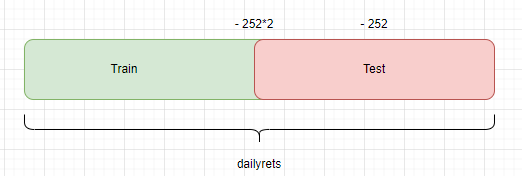

In [7]:
num_years = 2 #To test the allocation weights
x_train,x_test = dailyrets[:-(252*num_years)],dailyrets[-(252*num_years):]
print('Shape of x_train: ',x_train.shape)
print('Shape of x_test: ',x_test.shape)

Shape of x_train:  (542, 50)
Shape of x_test:  (504, 50)


In [8]:
x_train

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-20,-0.5861%,-0.4226%,0.5070%,1.0961%,0.8538%,1.0015%,-0.1722%,0.0893%,0.2768%,-0.7066%,...,0.0097%,5.7715%,0.2845%,0.1355%,-0.1422%,-1.5994%,-0.2989%,-2.0096%,0.6490%,-0.2710%
2017-11-21,0.5519%,-0.5187%,0.3027%,1.7967%,0.6311%,0.2493%,2.1516%,1.3976%,1.1274%,1.9611%,...,4.0414%,-0.6366%,0.2955%,1.3103%,-1.1282%,3.5759%,4.0181%,-0.4281%,3.5121%,-0.1189%
2017-11-22,3.4182%,1.2066%,-1.1522%,0.3924%,-0.5734%,-1.9782%,-0.8246%,-0.7429%,-0.8667%,0.5113%,...,-0.5204%,0.3295%,1.0253%,-0.0422%,0.2881%,-2.2780%,-0.2820%,1.6093%,-0.9808%,0.1020%
2017-11-23,-1.7853%,-1.2518%,0.6753%,-1.4653%,-0.8259%,-0.5806%,-0.5510%,-0.5023%,0.1508%,-0.2665%,...,1.7749%,0.2737%,-0.5483%,0.2320%,0.0224%,1.4505%,-0.8916%,-1.0696%,0.2811%,-0.2548%
2017-11-24,-0.6141%,0.0000%,0.2481%,0.7244%,0.5260%,1.4941%,0.0907%,1.1581%,-0.8437%,-0.3076%,...,0.8719%,1.4192%,-0.1760%,-0.5963%,0.2536%,0.9191%,2.9036%,1.3416%,-0.6874%,-0.2896%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-28,-2.1770%,-0.5172%,-0.4188%,-0.7040%,0.7711%,1.1682%,-4.5004%,2.8220%,0.2221%,0.0538%,...,1.0036%,-0.4446%,-3.3480%,-3.5031%,0.6684%,0.3474%,-1.5489%,-1.4518%,-0.0558%,-0.5299%
2020-01-29,2.7886%,1.0033%,-0.2578%,1.0112%,2.7302%,4.8896%,-0.2036%,-0.3951%,1.0358%,-0.6779%,...,-0.6182%,0.7224%,6.7859%,1.3333%,-1.3349%,1.2465%,-0.7364%,-0.8863%,0.9684%,1.1063%
2020-01-30,-1.3956%,0.4480%,-0.5916%,1.7352%,-2.5732%,-1.2378%,-0.0918%,-1.9622%,-0.1089%,-2.2858%,...,-1.7774%,-0.4825%,-0.9838%,-0.8072%,-0.7774%,-1.5917%,-0.5859%,-1.7994%,0.3689%,-2.4519%


# 4) Individual stock performance

In [ ]:
daily_std= x_train.std()
daily_ret= x_train.mean()
annualized_std = daily_std * math.sqrt(252)
annualized_ret = daily_ret*252 
StockMetrics = pd.concat([annualized_ret,annualized_std],axis=1)
StockMetrics.columns = ['Annualized Returns','Annualized Risk']
StockMetrics

,Annualized Returns,Annualized Risk
ADANIPORTS.NS,1.2028%,31.6374%
ASIANPAINT.NS,24.8767%,22.5001%
AXISBANK.NS,16.3345%,27.7934%
BAJAJ-AUTO.NS,5.8969%,23.7040%
BAJAJFINSV.NS,30.9722%,29.5564%
BAJFINANCE.NS,47.0776%,33.1202%
BHARTIARTL.NS,12.4436%,34.7508%
BPCL.NS,9.7267%,39.0894%
BRITANNIA.NS,17.7398%,23.0115%
CIPLA.NS,-11.1545%,24.3472%


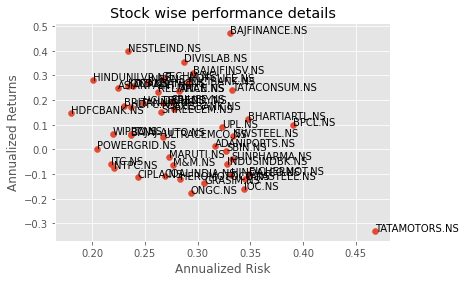

In [ ]:
plt.scatter(StockMetrics['Annualized Risk'],StockMetrics['Annualized Returns'])
for i in range(StockMetrics.shape[0]):
    plt.text(StockMetrics['Annualized Risk'][i],StockMetrics['Annualized Returns'][i],StockMetrics.index[i])
plt.xlabel('Annualized Risk')
plt.ylabel('Annualized Returns')
plt.title('Stock wise performance details')
plt.show()

In [ ]:
corr = dailyrets.corr()
corr.style.background_gradient()

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DIVISLAB.NS,DRREDDY.NS,EICHERMOT.NS,GRASIM.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HDFCLIFE.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,IOC.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
ADANIPORTS.NS,1.000000,0.302302,0.402519,0.325491,0.395159,0.392323,0.300900,0.314580,0.290039,0.178434,0.297814,0.281527,0.172720,0.311680,0.434499,0.239959,0.405546,0.390093,0.327066,0.316292,0.411338,0.253315,0.409825,0.319184,0.225550,0.320082,0.307322,0.445699,0.361571,0.461726,0.344264,0.387107,0.202987,0.327451,0.327678,0.230773,0.361490,0.288611,0.418066,0.403644,0.260577,0.374811,0.359447,0.400611,0.214530,0.298744,0.295684,0.445325,0.325556,0.199728
ASIANPAINT.NS,0.302302,1.000000,0.346283,0.334818,0.375196,0.364176,0.258257,0.300957,0.422980,0.158773,0.172381,0.245832,0.216786,0.362994,0.375404,0.240072,0.352032,0.345970,0.326532,0.347368,0.299380,0.458115,0.319602,0.284582,0.239693,0.270357,0.273174,0.339744,0.371791,0.378432,0.318488,0.443148,0.450502,0.214843,0.191686,0.183013,0.372934,0.252041,0.276364,0.402565,0.160811,0.359884,0.244377,0.253496,0.208642,0.253603,0.386966,0.462531,0.333120,0.193377
AXISBANK.NS,0.402519,0.346283,1.000000,0.398273,0.553288,0.528631,0.315419,0.383720,0.322599,0.184003,0.316681,0.219443,0.172327,0.416409,0.503121,0.201927,0.541403,0.525694,0.355396,0.351762,0.477505,0.282811,0.731785,0.546283,0.262932,0.353243,0.353413,0.483454,0.484399,0.542806,0.446356,0.491096,0.265923,0.347419,0.345282,0.273597,0.394380,0.335389,0.621786,0.397509,0.243221,0.354740,0.395616,0.411376,0.237875,0.284185,0.410427,0.447768,0.406775,0.230400
BAJAJ-AUTO.NS,0.325491,0.334818,0.398273,1.000000,0.411048,0.391825,0.306006,0.320220,0.338936,0.214893,0.259481,0.282806,0.242788,0.453130,0.421666,0.200802,0.384885,0.428546,0.321914,0.659578,0.374488,0.332419,0.372605,0.348550,0.214010,0.319303,0.301990,0.386754,0.386420,0.396703,0.442815,0.528532,0.258371,0.254963,0.303408,0.254465,0.355499,0.327642,0.339042,0.345123,0.261672,0.317360,0.378216,0.318370,0.245360,0.214404,0.402085,0.384403,0.296267,0.261378
BAJAJFINSV.NS,0.395159,0.375196,0.553288,0.411048,1.000000,0.812703,0.348495,0.385812,0.389451,0.153534,0.285718,0.256452,0.159964,0.436116,0.503044,0.210837,0.556174,0.525634,0.378516,0.389414,0.439104,0.326008,0.548806,0.491150,0.254498,0.355934,0.356035,0.476447,0.509720,0.545657,0.464617,0.465557,0.268014,0.320068,0.342143,0.264348,0.381008,0.380709,0.524390,0.448738,0.234770,0.409258,0.383466,0.447710,0.206092,0.294883,0.408840,0.475495,0.386359,0.215617
BAJFINANCE.NS,0.392323,0.364176,0.528631,0.391825,0.812703,1.000000,0.327464,0.365732,0.385128,0.136591,0.264443,0.252876,0.137131,0.459659,0.429809,0.203037,0.575256,0.548054,0.389523,0.390821,0.414222,0.317597,0.553503,0.486201,0.246351,0.334330,0.304094,0.454284,0.546075,0.502393,0.448894,0.474240,0.245732,0.304552,0.333255,0.228817,0.372740,0.347306,0.526661,0.408329,0.214046,0.403290,0.383925,0.421394,0.181929,0.276349,0.394125,0.447777,0.346530,0.202866
BHARTIARTL.NS,0.300900,0.258257,0.315419,0.306006,0.348495,0.327464,1.000000,0.258231,0.213862,0.217172,0.172679,0.271649,0.170833,0.255661,0.425761,0.194427,0.324766,0.307265,0.290694,0.281219,0.353006,0.231798,0.312853,0.294906,0.198431,0.211886,0.270140,0.351392,0.261949,0.329484,0.305270,0.313909,0.183509,0.250209,0.230344,0.245444,0.279744,0.224367,0.322795,0.291373,0.235096,0.298924,0.278249,0.323055,0.167279,0.202854,0.250016,0.370369,0.260481,0.147483
BPCL.NS,0.314580,0.300957,0.383720,0.320220,0.385812,0.365732,0.258231,1.000000,0.260608,0.156394,0.378628,0.216821,0.162126,0.336065,0.393359,0.178949,0.350590,0.340677,0.278258,0.295353,0.3931

# 5) Optimization with initial params

In [ ]:
# Building the portfolio object
port = pf.Portfolio(returns=x_train)

# Calculating optimal portfolio
# Select method and estimate input parameters:
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:
model ='Classic' # Could be Classic(historical), BL(Black Litterman), FM(Factor Model) or BL_FM(Black litterman with factors)
rm = 'MV' # Risk measure used, there are 13 available risk measures
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'
w_orig = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
w_orig.T

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DIVISLAB.NS,DRREDDY.NS,EICHERMOT.NS,GRASIM.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HDFCLIFE.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,IOC.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
weights,0.0000%,1.5416%,0.0000%,0.0000%,0.0000%,8.1001%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,9.2961%,3.8419%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,5.2101%,0.0000%,0.0000%,8.0510%,0.8006%,0.0000%,10.4177%,0.0000%,0.0000%,0.0000%,7.3355%,0.0000%,0.0000%,0.0000%,21.3287%,0.0000%,0.0000%,0.0000%,1.1744%,7.4408%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,11.8556%,3.6057%,0.0000%,0.0000%,0.0000%,0.0000%


# 6) Analyzing the results

## Stock wise allocation

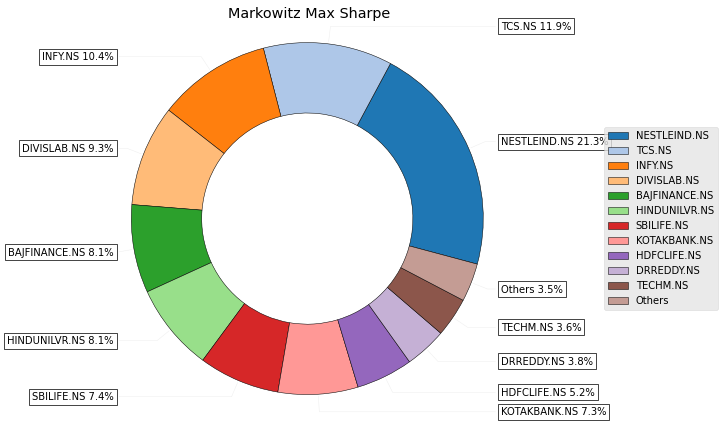

In [ ]:
# Plotting the composition of the portfolio
ax = plf.plot_pie(w=w_orig, title='Markowitz Max Sharpe',  height=6, width=10)

# 7) Weights based on clustering

In [ ]:
port = pf.HCPortfolio(returns=x_train)
model='HRP' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'ward' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram
w = port.optimization(model=model,
              codependence=codependence,
              rm=rm,
              rf=rf,
              linkage=linkage,
              max_k=max_k,
              leaf_order=leaf_order)
w.T

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DIVISLAB.NS,DRREDDY.NS,EICHERMOT.NS,GRASIM.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HDFCLIFE.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,IOC.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
weights,1.1312%,1.9641%,1.3198%,2.5617%,1.7215%,0.9065%,1.7316%,1.0873%,2.0827%,3.2300%,2.8579%,2.3178%,2.8474%,1.1098%,0.9895%,3.3055%,1.9696%,3.0969%,1.9748%,1.7901%,0.7189%,2.4483%,1.2017%,1.0550%,2.3367%,0.9120%,4.3955%,0.8189%,1.8326%,2.3640%,1.1652%,1.2022%,1.8039%,2.9788%,1.2551%,3.4405%,3.0363%,2.9910%,1.3657%,2.1348%,2.1984%,2.3548%,0.4151%,0.6630%,3.5618%,2.0855%,2.0274%,1.3008%,1.6083%,4.3321%


## Dendogram plot

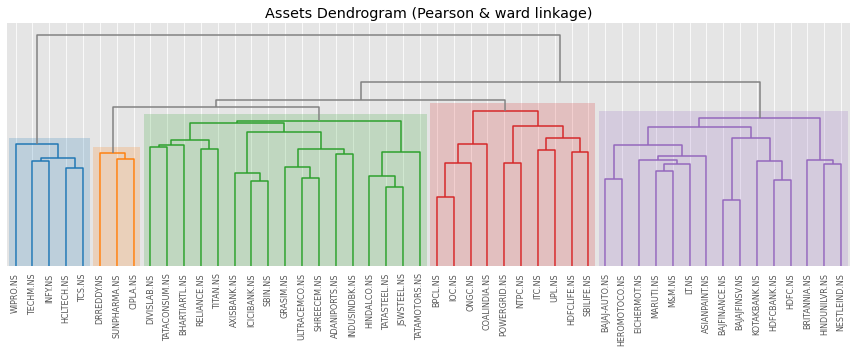

In [ ]:
ax = pf.plot_dendrogram(returns=x_train,
                        codependence=codependence,
                        linkage=linkage,
                        max_k=max_k,
                        leaf_order=leaf_order)

## Stock wise allocation

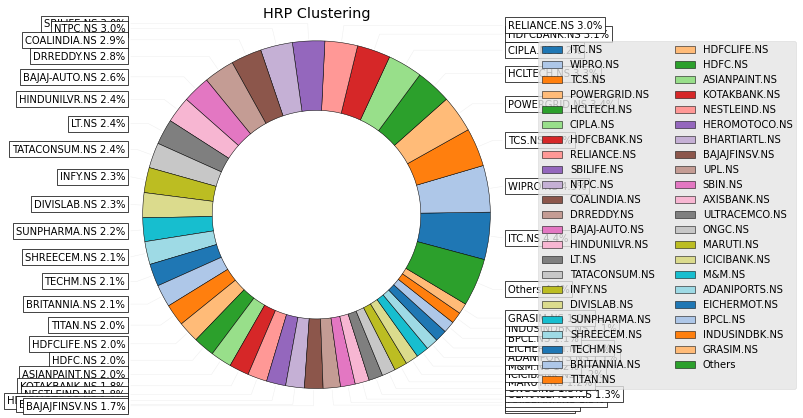

In [ ]:
# Plotting the composition of the portfolio
ax = plf.plot_pie(w=w, title='HRP Clustering',  height=6, width=10)

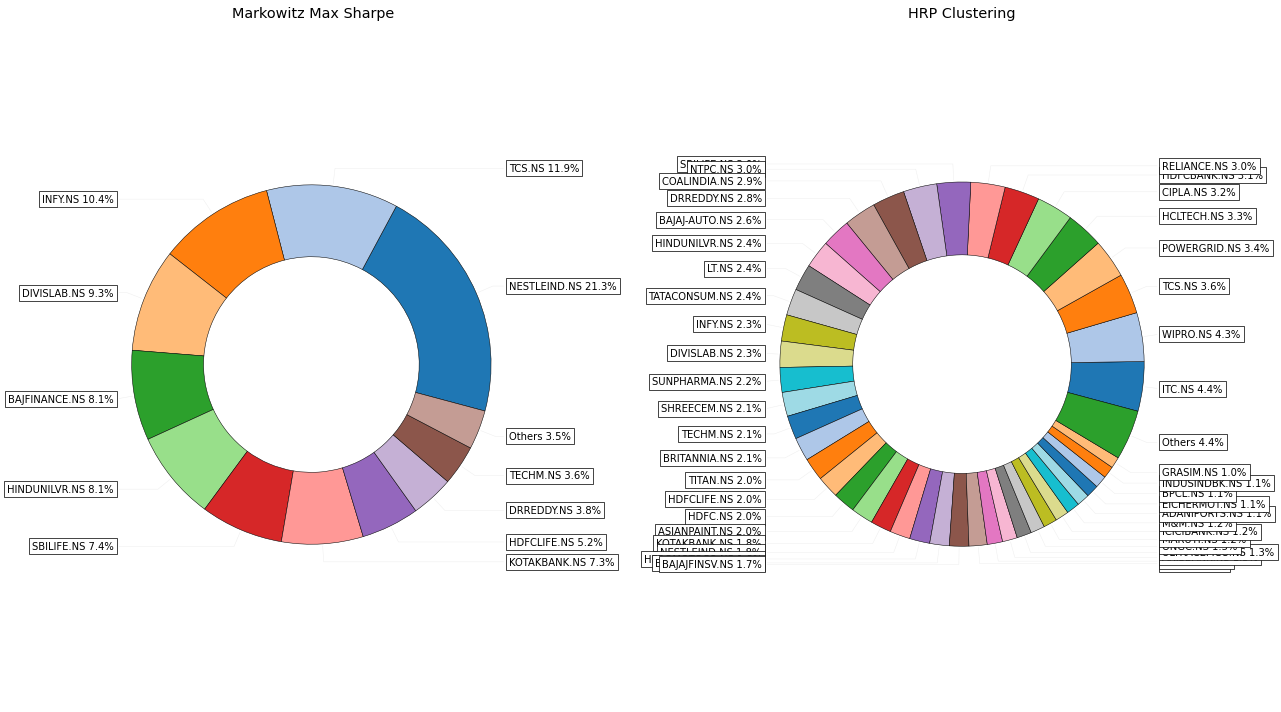

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols=2,figsize = (20,10))
plf.plot_pie(w=w_orig, title='Markowitz Max Sharpe',ax=ax1)
plf.plot_pie(w=w, title='HRP Clustering',ax=ax2)
ax1.get_legend().remove()
ax2.get_legend().remove()
plt.show()

In [ ]:
df = pd.concat([w,w_orig], keys=['Risk Parity', 'Markowits'], axis=1)
df.to_csv('portfolio_weights_Nifty.csv')

In [ ]:
rp.excel_report(returns, with, MAR=0, alpha=0.05, name='report', files=None)

## Stock wise risk contribution

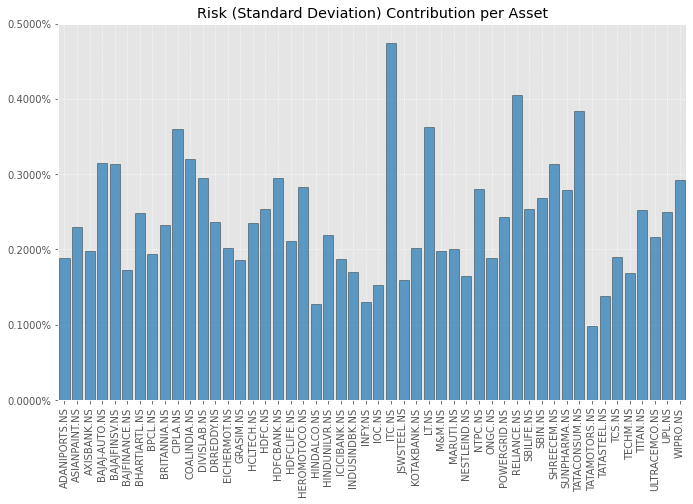

In [ ]:
cov = port.cov
ax = pf.plot_risk_con(w=w, cov=cov, returns=x_train, rm=rm,
                      rf=0, alpha=0.05, color="tab:blue", height=6,
                      width=10, t_factor=252, ax=None)
plt.xticks(rotation = 90)
plt.show()

## Historic portfolio performance

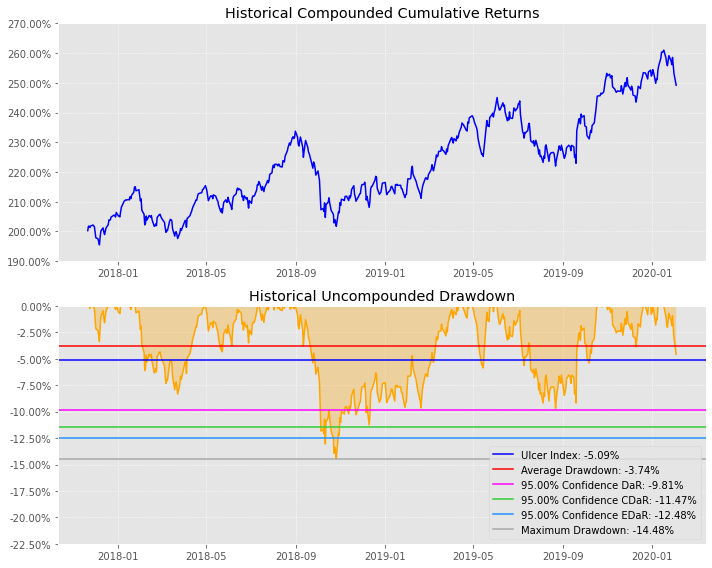

In [ ]:
ax = pf.plot_drawdown(nav=x_train.add(1).cumprod(), w=w, alpha=0.05, height=8, width=10, ax=None)

## Test performance

### Test Equity curve

In [ ]:
w['weights']

ADANIPORTS.NS   1.1312%
ASIANPAINT.NS   1.9641%
AXISBANK.NS     1.3198%
BAJAJ-AUTO.NS   2.5617%
BAJAJFINSV.NS   1.7215%
BAJFINANCE.NS   0.9065%
BHARTIARTL.NS   1.7316%
BPCL.NS         1.0873%
BRITANNIA.NS    2.0827%
CIPLA.NS        3.2300%
COALINDIA.NS    2.8579%
DIVISLAB.NS     2.3178%
DRREDDY.NS      2.8474%
EICHERMOT.NS    1.1098%
GRASIM.NS       0.9895%
HCLTECH.NS      3.3055%
HDFC.NS         1.9696%
HDFCBANK.NS     3.0969%
HDFCLIFE.NS     1.9748%
HEROMOTOCO.NS   1.7901%
HINDALCO.NS     0.7189%
HINDUNILVR.NS   2.4483%
ICICIBANK.NS    1.2017%
INDUSINDBK.NS   1.0550%
INFY.NS         2.3367%
IOC.NS          0.9120%
ITC.NS          4.3955%
JSWSTEEL.NS     0.8189%
KOTAKBANK.NS    1.8326%
LT.NS           2.3640%
M&M.NS          1.1652%
MARUTI.NS       1.2022%
NESTLEIND.NS    1.8039%
NTPC.NS         2.9788%
ONGC.NS         1.2551%
POWERGRID.NS    3.4405%
RELIANCE.NS     3.0363%
SBILIFE.NS      2.9910%
SBIN.NS         1.3657%
SHREECEM.NS     2.1348%
SUNPHARMA.NS    2.1984%
TATACONSUM.NS   

<AxesSubplot:title={'center':'DirectStock investment'}, xlabel='Date'>

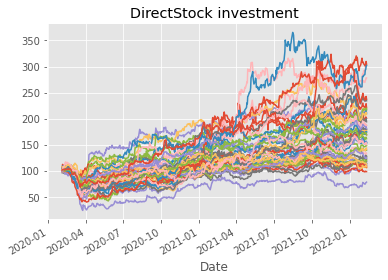

In [ ]:
(x_test.add(1).cumprod()*100).plot(title = 'DirectStock investment', legend = False)

<AxesSubplot:title={'center':'Portfolio investment'}, xlabel='Date'>

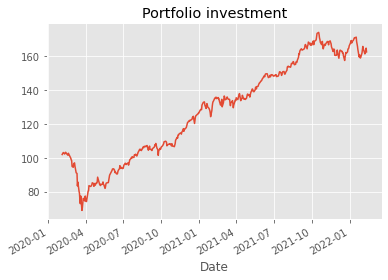

In [ ]:
(x_test.add(1).cumprod() * w['weights']*100).sum(axis=1).plot(title = 'Portfolio investment', legend = False)

<AxesSubplot:title={'center':'Portfolio investment'}, xlabel='Date'>

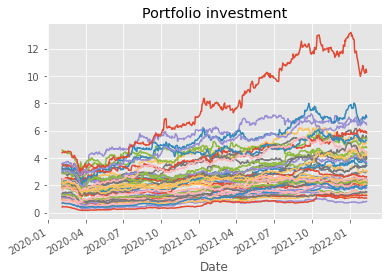

In [ ]:
(x_test.add(1).cumprod() * w['weights']*100).plot(title = 'Portfolio investment', legend = False)

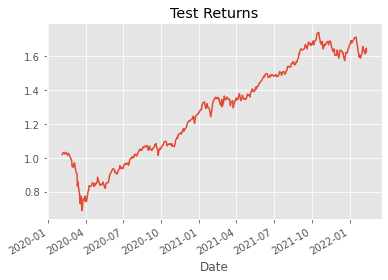

In [ ]:
test_eq_curve = (x_test.add(1).cumprod()*w['weights']).sum(axis=1)
test_eq_curve.plot()
plt.title('Test Returns')
plt.show()

In [ ]:
test_eq_curve.resample('Q').last().pct_change()

Date
2020-03-31        NaN
2020-06-30   20.9407%
2020-09-30   12.3644%
2020-12-31   19.9639%
2021-03-31    5.9673%
2021-06-30   10.8255%
2021-09-30   12.4192%
2021-12-31   -0.3514%
2022-03-31   -2.1394%
Freq: Q-DEC, dtype: float64

In [ ]:
test_rets = test_eq_curve.pct_change()

### Benchmark returns

In [ ]:
benchmark_prices = yf.download('^NSEI',progress=False)
benchmark_rets = benchmark_prices['Adj Close'].pct_change()
compare_rets = pd.concat([test_rets,benchmark_rets],axis=1)
start_date = max(benchmark_rets.index.min(),test_rets.index.min())
compare_rets = compare_rets.loc[start_date:].fillna(0).dropna()
compare_rets.columns = ['test_rets','benchmark_rets']
compare_rets = compare_rets.dropna()
compare_rets.head()

,test_rets,benchmark_rets
Date,,
2020-02-04,0.0000%,2.3211%
2020-02-05,0.4959%,0.9141%
2020-02-06,0.4002%,0.4037%
2020-02-07,0.2675%,-0.3263%
2020-02-10,-0.8682%,-0.5526%


### Pyfolio analysis

Start date,2020-02-04
End date,2022-02-11
Total months,24
,Backtest
Annual return,26.271%
Cumulative returns,59.444%
Annual volatility,21.652%
Sharpe ratio,1.19
Calmar ratio,0.79
Stability,0.92
Max drawdown,-33.203%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,33.20,2020-02-12,2020-03-23,2020-08-07,128
1,9.52,2021-10-18,2021-12-20,NaT,NaN
2,6.55,2021-01-14,2021-01-29,2021-02-04,16
3,6.49,2020-09-18,2020-09-24,2020-10-08,15
4,5.09,2021-03-03,2021-03-25,2021-04-07,26


Stress Events,mean,min,max
New Normal,0.10%,-10.98%,8.28%


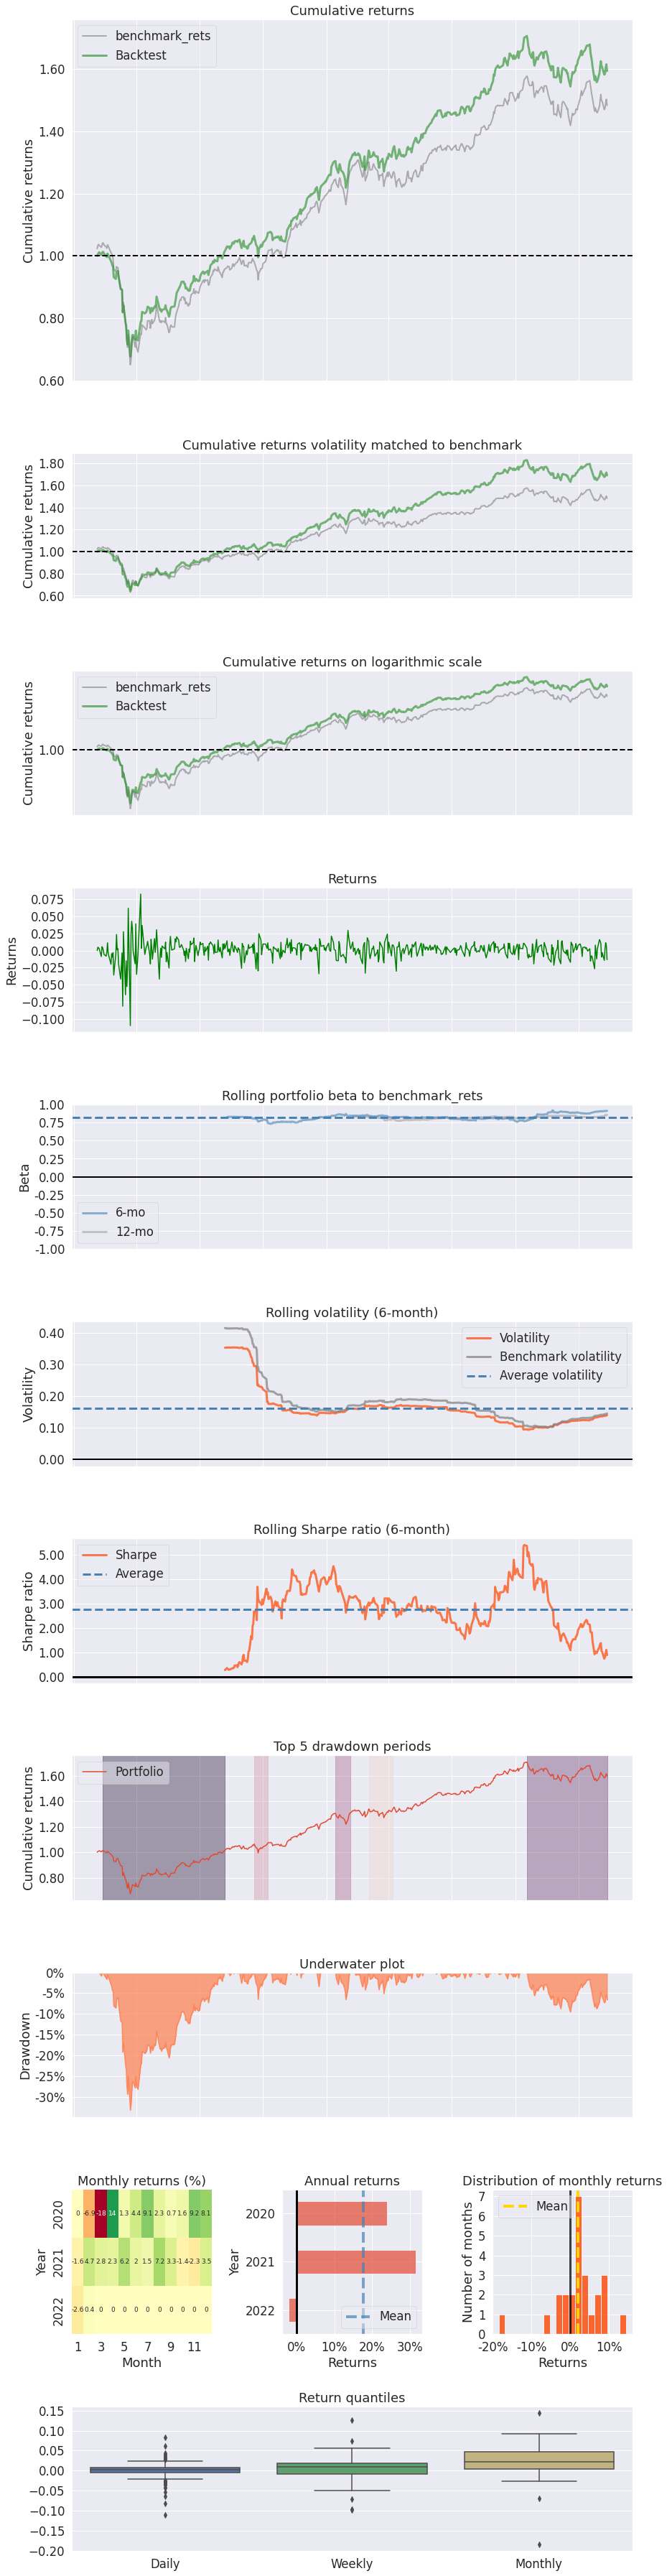

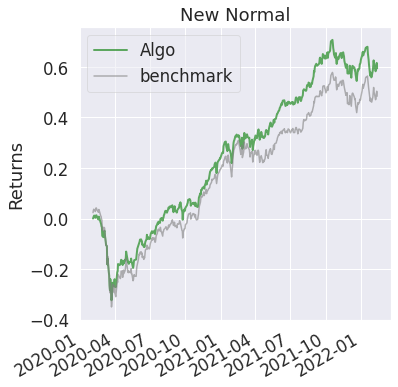

In [ ]:
pyf.create_full_tear_sheet(returns=compare_rets['test_rets'],benchmark_rets=compare_rets['benchmark_rets'])